# Financial Inclusion in Africa

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## Extraction stage

### 1- Collection datas

In [2]:
df_train = pd.read_csv('Train.csv')
df_train.head(10)

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed
5,Kenya,2018,uniqueid_6,No,Rural,No,7,26,Female,Spouse,Married/Living together,Primary education,Informally employed
6,Kenya,2018,uniqueid_7,No,Rural,Yes,7,32,Female,Spouse,Married/Living together,Primary education,Self employed
7,Kenya,2018,uniqueid_8,No,Rural,Yes,1,42,Female,Head of Household,Married/Living together,Tertiary education,Formally employed Government
8,Kenya,2018,uniqueid_9,Yes,Rural,Yes,3,54,Male,Head of Household,Married/Living together,Secondary education,Farming and Fishing
9,Kenya,2018,uniqueid_10,No,Urban,Yes,3,76,Female,Head of Household,Divorced/Seperated,No formal education,Remittance Dependent


In [3]:
df_test = pd.read_csv("Test.csv")
df_test.head()

,country,year,uniqueid,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_6056,Urban,Yes,3,30,Male,Head of Household,Married/Living together,Secondary education,Formally employed Government
1,Kenya,2018,uniqueid_6060,Urban,Yes,7,51,Male,Head of Household,Married/Living together,Vocational/Specialised training,Formally employed Private
2,Kenya,2018,uniqueid_6065,Rural,No,3,77,Female,Parent,Married/Living together,No formal education,Remittance Dependent
3,Kenya,2018,uniqueid_6072,Rural,No,6,39,Female,Head of Household,Married/Living together,Primary education,Remittance Dependent
4,Kenya,2018,uniqueid_6073,Urban,No,3,16,Male,Child,Single/Never Married,Secondary education,Remittance Dependent


In [4]:
submissionSample = pd.read_csv("SampleSubmission.csv")
submissionSample.head(10)

,unique_id,bank_account
0,uniqueid_1 x Kenya,0
1,uniqueid_2 x Kenya,0
2,uniqueid_3 x Kenya,0
3,uniqueid_4 x Kenya,0
4,uniqueid_5 x Kenya,0
5,uniqueid_6 x Kenya,0
6,uniqueid_7 x Kenya,0
7,uniqueid_8 x Kenya,0
8,uniqueid_9 x Kenya,0
9,uniqueid_10 x Kenya,0


In [5]:
variable = pd.read_csv('VariableDefinitions.csv')
variable

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,The interviewee’s relationship with the head o...
9,marital_status,The martial status of the interviewee: Married...


### 2- Understand data

In [6]:
df_train.isnull().sum()

country                   0
year                      0
uniqueid                  0
bank_account              0
location_type             0
cellphone_access          0
household_size            0
age_of_respondent         0
gender_of_respondent      0
relationship_with_head    0
marital_status            0
education_level           0
job_type                  0
dtype: int64

No missing value in the dataset

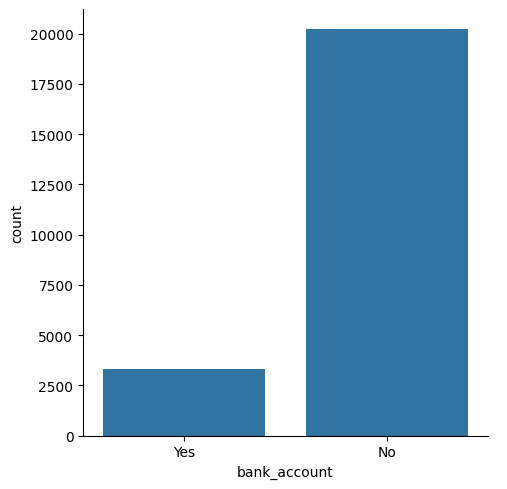

In [7]:
# display the target distribution

sns.catplot(x='bank_account', kind='count', data=df_train)

In [8]:
df_train.describe(include='all')

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
count,23524,23524.000000,23524,23524,23524,23524,23524.000000,23524.000000,23524,23524,23524,23524,23524
unique,4,NaN,8735,2,2,2,NaN,NaN,2,6,5,6,10
top,Rwanda,NaN,uniqueid_1,No,Rural,Yes,NaN,NaN,Female,Head of Household,Married/Living together,Primary education,Self employed
freq,8735,NaN,4,20212,14343,17454,NaN,NaN,13877,12831,10749,12791,6437
mean,NaN,2016.975939,NaN,NaN,NaN,NaN,3.797483,38.805220,NaN,NaN,NaN,NaN,NaN
std,NaN,0.847371,NaN,NaN,NaN,NaN,2.227613,16.520569,NaN,NaN,NaN,NaN,NaN
min,NaN,2016.000000,NaN,NaN,NaN,NaN,1.000000,16.000000,NaN,NaN,NaN,NaN,NaN
25%,NaN,2016.000000,NaN,NaN,NaN,NaN,2.000000,26.000000,NaN,NaN,NaN,NaN,NaN
50%,NaN,2017.000000,NaN,NaN,NaN,NaN,3.000000,35.000000,NaN,NaN,NaN,NaN,NaN
75%,NaN,2018.000000,NaN,NaN,NaN,NaN,5.000000,49.000000,NaN,NaN,NaN,NaN,NaN


In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


In [10]:
df_train["location_type"].unique()

array(['Rural', 'Urban'], dtype=object)

In [11]:
df_train["cellphone_access"].unique()

array(['Yes', 'No'], dtype=object)

## transform stage

### 1- Preprocessing data

In [12]:
#import preprocessing module
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

In [13]:
le = LabelEncoder()
df_train['bank_account'] = le.fit_transform(df_train['bank_account'])

# separated training features from target
X_train = df_train.drop(['bank_account'], axis=1)
y_train = df_train[['bank_account']]

y_train

,bank_account
0,1
1,0
2,1
3,0
4,0
...,...
23519,0
23520,0
23521,0
23522,0


In [14]:
def preprocessing_data(data):
    # convert data from integer to float
    table = data[['household_size', 'age_of_respondent', 'year']].values.astype(float)

    # categorical features to be onverted to one hot encoder
    categorical = ['country', 'job_type', 'education_level', 'marital_status', 'relationship_with_head']

    # one hot encoder convertion
    data = pd.get_dummies(data, prefix_sep='_', columns=categorical)

    # Label encoder convertion
    data['location_type'] = le.fit_transform(data['location_type'])
    data['cellphone_access'] = le.fit_transform(data['cellphone_access'])
    data['gender_of_respondent'] = le.fit_transform(data['gender_of_respondent'])

    # drop uniqueId
    data = data.drop(['uniqueid'], axis=1)

    #scale our data into range of 0 to 1
    scaler = MinMaxScaler(feature_range=(0,1))
    data = scaler.fit_transform(data)

    return data

In [15]:
p_train = preprocessing_data(X_train)
p_test = preprocessing_data(df_test)

In [16]:
p_train[:1]

array([[1.       , 0.       , 1.       , 0.1      , 0.0952381, 0.       ,
        1.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        0.       , 1.       , 0.       , 0.       , 0.       , 1.       ,
        0.       , 0.       , 0.       , 0.       , 1.       , 0.       ,
        0.       , 0.       , 0.       , 0.       , 0.       , 0.       ,
        1.       ]])

# Model building

### separate training set and testing set

In [17]:
from sklearn.model_selection import train_test_split

X_Train, X_Test, y_Train, y_Test = train_test_split(p_train, y_train, test_size = 0.1, random_state=20)

### use the randomForest algorithm to build the model

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

In [19]:
rf = RandomForestClassifier()
rf.fit(X_Train, y_Train)

C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:1152: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestClassifier()

In [27]:
y_hatrf = rf.predict(X_Test)

In [28]:
accuracy_rf = accuracy_score(y_Test, y_hat)
print(f"Error rate estimator is {1 - accuracy_rf}")

Error rate estimator is 0.13047173820654479


now let us try to use xgboost

In [24]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(X_Train, y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [26]:
y_hatxg = xg.predict(X_Test)
accuracy_xg = accuracy_score(y_Test, y_hatxg)
print(f"Error rate estimator is {1 - accuracy_xg}")

Error rate estimator is 0.11262218444538885


In [32]:
confusion_matrix(xg, X_Test, y_hatxg, normalise='true')

TypeError: too many positional arguments

In [37]:
from sklearn.model_selection import GridSearchCV

# Optimize model parameters
# I run this code in google colab to make the execution much faster and use the best params in the next code
param_grid = {'min_child_weighth': [1, 5, 10],
        'gamma': [0.5, 0.75, 1],
        'subsample': [0.6, 0.8, 1.0],
        'max_depth': [3, 4, 5]
        }
my_xgb = GridSearchCV(xg, param_grid,n_jobs=-1,verbose=2,cv=5)
my_xgb.fit(X_Train, y_Train)
print(my_xgb.best_params_)    

Fitting 5 folds for each of 81 candidates, totalling 405 fits
{'gamma': 1, 'max_depth': 3, 'min_child_weighth': 1, 'subsample': 1.0}


C:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\xgboost\core.py:160: UserWarning: [10:12:01] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-0b3782d1791676daf-1\xgboost\xgboost-ci-windows\src\learner.cc:742: 
Parameters: { "min_child_weighth" } are not used.

  warnings.warn(smsg, UserWarning)


In [36]:
xg2 = XGBClassifier(min_child_weight=1, gamma=1, subsample=1.0, max_depth=3)
xg2.fit(X_Train, y_Train)
y_hatxg2 = xg2.predict(X_Test)
accuracy_xg2 = accuracy_score(y_Test, y_hatxg2)
print(f"Error rate estimator is {1 - accuracy_xg2}")

Error rate estimator is 0.10667233319167024


### Train our model on all train.csv data

In [38]:
xg2.fit(p_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=3, max_leaves=None,
              min_child_weight=1, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [41]:
df_test.bank_account = xg2.predict(p_test)

C:\Users\user\AppData\Local\Temp\ipykernel_19232\2071853958.py:1: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  df_test.bank_account = xg2.predict(p_test)


In [47]:
# Create submission DataFrame
submission = pd.DataFrame({"uniqueid": df_test["uniqueid"] + " x " + df_test["country"],
                           "bank_account": df_test.bank_account})
submission.sample(5)

,uniqueid,bank_account
2245,uniqueid_8314 x Kenya,0
6589,uniqueid_6864 x Tanzania,0
7398,uniqueid_7673 x Tanzania,1
7614,uniqueid_7889 x Tanzania,0
480,uniqueid_6549 x Kenya,0


In [50]:
submission.to_csv('first_submission.csv', index = False)
files.download('first_submission.csv') 

NameError: name 'files' is not defined